# Заряд/разряд ёмкости

Напряжение на ёмкости:
$ U_C(t) = \frac{1}{C} \int_0^t i_C \mathrm{d}t $

Ток через ёмкость:
$ I_C = C (\frac{\mathrm{d}U_C}{\mathrm{d}t}) $

## Постоянным напряжением в RC цепи

Постоянная времени RC цепи:
$ \tau = RC $

### Заряд
Напряжение на ёмкости:
$ U_C(t) = U(1-e^{-\frac{t}{\tau}}) $

Ток через ёмкость (при отсутствии тока перед зарядом):
$ I_C(t) = \frac{U}{R}(1-e^{-\frac{t}{\tau}}) $

### Разряд
Напряжение на ёмкости:
$ U_C(t) = Ue^{-\frac{t}{\tau}} $

Ток через ёмкость (при отсутствии тока перед зарядом):
$ I_C(t) = \frac{U}{R}e^{-\frac{t}{\tau}} $

## Постоянным током

$ U_C(t) = \frac{1}{C} \int_0^t i_C \mathrm{d}t |^{i = const} \implies U_C(t) = \frac{I_C}{C} t $

Таблица скорости изменения напряжения $ \frac{\mathrm{d}U_C}{\mathrm{d}t} $ от ёмкости $ C $ и тока $ I_C $:

Ёмкость | Ток | $ \frac{\mathrm{d}U_C}{\mathrm{d}t} $
------- | --- | -----------------------------
1 μФ | 1 мА | 1 В/мс
100 μФ | 100 мА | 1 В/мс
100 μФ | 1 мА | 10 В/с
100 μФ | 1 μА | 10 мВ/с
1 Ф | 1 мА | 1 мВ/с
100 Ф | 1 А | 10 мВ/с
100 Ф | 1 мА | 10 μВ/с


In [77]:
import math
class CR():
    def __init__(self, c, r):
        self.c, self.r = c, r
    @property
    def tau(self): return self.c*self.r
    def charge_u(self, u, t):
        return u*(1-math.exp(-t/self.tau))
    def charge_i(self, u, t):
        return (u/self.r)*math.exp(-t/self.tau)
    def discharge_u(self, u, t):
        return u*math.exp(-t/self.tau)
    def discharge_i(self, u, t):
        return -(u/self.r)*math.exp(-t/self.tau)

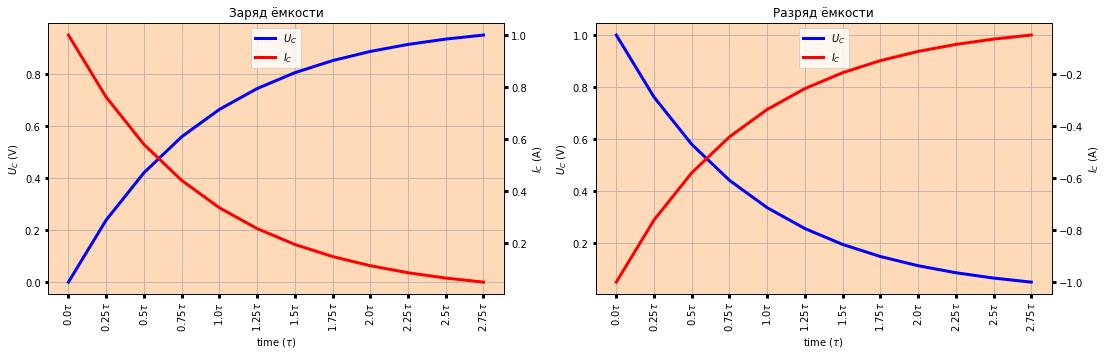

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
cr1 = CR(1, 1)
fig, (ax_charge, ax_discharge) = plt.subplots(1, 2)
num_points, tau_miltiply, u = 12, 3, 1
x_range = numpy.linspace(0, cr1.tau*tau_miltiply, num=num_points)
fig.set_size_inches(18, 5)

def plot_u_i(ax, u_data, i_data, title):
    p1 = ax.plot(x_range, u_data, linewidth=3, color='blue', label='$U_C$')
    ax.set(xlabel='time ($ \\tau $)', ylabel='$U_C$ (V)', facecolor='peachpuff', title=title)
    ax2 = ax.twinx()
    p2 = ax2.plot(x_range, i_data, linewidth=3, color='red', label='$I_C$')
    ax2.set(ylabel='$I_C$ (A)')
    # ax2.tick_params(axis='y', colors='yellow') ; ax2.yaxis.label.set_color('yellow')
    ax2.tick_params(width=3)
    # ax.tick_params(axis='x', colors='yellow') ; ax.tick_params(axis='y', colors='yellow')
    # ax.xaxis.label.set_color('yellow') ; ax.yaxis.label.set_color('yellow')
    ax.set_xticks(x_range)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticklabels([ '${}\\tau$'.format((i*tau_miltiply)/num_points) for i in range(num_points) ])
    ax.tick_params(width=3)
    ax.grid()
    # ax.title.set_color('yellow')
    ax.legend([p1[0], p2[0]], [p1[0].get_label(), p2[0].get_label()], loc='upper center')

plot_u_i(ax_charge, [ cr1.charge_u(u, i) for i in x_range ], [ cr1.charge_i(u, i) for i in x_range ], 'Заряд ёмкости')
plot_u_i(ax_discharge, [ cr1.discharge_u(u, i) for i in x_range ], [ cr1.discharge_i(u, i) for i in x_range ], 'Разряд ёмкости')